# CS210 - Introduction to Data Science - Individual Project
### Oguz Mesum ID:25032


# Data Exploration

In [1]:
#import necessary libraries for analysis
import csv
import pandas as pd
import reverse_geocoder as rg
from geopy.distance import geodesic
from itertools import tee
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("taxi-trips.csv") #Import NYC taxi-trips csv file and apply it into pandas dataframe
df.head() #Display Dataframe

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118185 entries, 0 to 118184
Data columns (total 11 columns):
id                    118185 non-null object
vendor_id             118185 non-null int64
pickup_datetime       118185 non-null object
dropoff_datetime      118185 non-null object
passenger_count       118185 non-null int64
pickup_longitude      118185 non-null float64
pickup_latitude       118185 non-null float64
dropoff_longitude     118185 non-null float64
dropoff_latitude      118185 non-null float64
store_and_fwd_flag    118185 non-null object
trip_duration         118185 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ MB


In [4]:
df.describe() #Statistics about our dataframe

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [5]:
print(df.dtypes) #Print the datatype of each column in our dataframe

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


In [6]:
print(df.columns) #Print the columns of dataframe

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [7]:
pickup = df[['pickup_latitude', 'pickup_longitude']].apply(tuple, axis=1).tolist()
dropoff = df[['dropoff_latitude', 'dropoff_longitude']].apply(tuple, axis=1).tolist()

pickup_results = rg.search(pickup, mode=2)
df['pickup_district'] = [a['name'] for a in pickup_results]

dropoff_results = rg.search(dropoff, mode=2)
df['dropoff_district'] = [b['name'] for b in dropoff_results]

#Using reverse_geocoder library we apply reverse search to get the coordinates of pickup and dropoff locations.

Loading formatted geocoded file...


In [8]:
df.head() #New dataframe including pickup_district and dropoff_district.

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


In [9]:
df['distance']=0.0
for index, row in df.iterrows():
    if index>=0:
        x=geodesic((row[8],row[7]),(row[6],row[5])).km
        df.at[index,'distance'] = x
#We do use geodesic from geopy.distance to get the distance between pickup and dropoff coordinates 
#and add it into new column in our dataframe.


In [10]:
df.head() #New dataframe including distance column.

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.502172
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5.114807
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1.495018
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.976279
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2.513961


In [11]:
p=df['pickup_district'].value_counts() #Get the top 5 pickup_district
print(p.nlargest()) 

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64


In [12]:
d=df["dropoff_district"].value_counts() #Get the top 5 dropoff_district
print(d.nlargest()) 

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64


In [16]:
def assign_time(time): # Function to apply time_of_day to dataframe
    if 7<time<9:
        return "rush_hour_morning"
    elif 9<time<16:
        return "afternoon"
    elif 16<time<18:
        return "rush_hour_evening"
    elif 18<time<23:
        return "evening"
    else:
        return "late_night"
    
df["time_of_day"]="" #create time of day column
df["day"]="" #create day of the week column

weekDays=["Monday","Tuesday","Wednesday","Thursday","Friday","Sunday","Saturday"]

In [17]:
for index, row in df.iterrows(): # iterate over each row
    if index>=0:
        x=df.at[index,"pickup_datetime"].split(' ') # create a list contatining date and time
        dt = datetime.datetime.strptime(x[0], '%Y-%m-%d')
        df.at[index,"day"]=weekDays[dt.weekday()]
        x=x[1].split(':')
        hour=float(x[0])# operations for total time (convert minute and second to hour format)
        minu=float(x[1])/60
        sec=float(x[2])/3600
        pickup_time=hour+minu+sec #add each of the converted values to total total in minutes
        df.at[index,'time_of_day'] = assign_time(pickup_time) #send it to function to get time of day value

In [18]:
df.head() #New dataframe including time_of_day and day after previous 2 operations

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day,day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.502172,rush_hour_evening,Monday
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5.114807,evening,Thursday
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1.495018,rush_hour_morning,Friday
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.976279,afternoon,Monday
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2.513961,afternoon,Monday


###  How the average distance varies as time of the day changes.

Text(0.5, 1.0, 'Distance in each time of the day')

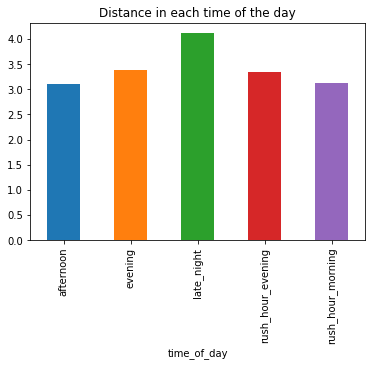

In [19]:
a=df.groupby('time_of_day')['distance'].mean()#Group the dataframe with respect to time of day
                                              #and get distance means
a.plot(kind="bar")

plt.title("Distance in each time of the day")

As seen on the graph late night(11 PM - 7 AM) has the highest and afternoon(9 AM - 4 PM) has the lowest average distance
We can say that after the rush hour (4-6 PM) time period there is a huge increase in average mean as seen on the late_night(11 PM - 7 AM).

In short we can say that average distance do increase from evening(6-11 PM) to late night and decrease from late night to rush hour morning(7-9 AM).

###  How the trip duration varies as time of the day changes.

Text(0.5, 1.0, 'Trip Duration in each time of the day')

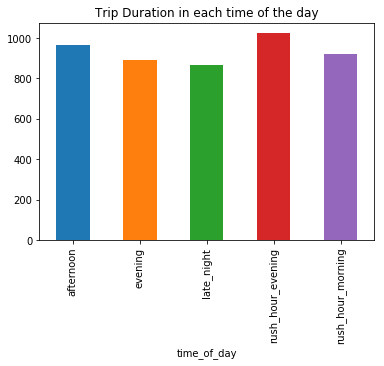

In [20]:
b=df.groupby('time_of_day')['trip_duration'].mean() #Group the dataframe with respect to time of day
                                                    #and get trip_duration means
b.plot(kind="bar")

plt.title("Trip Duration in each time of the day")

As seen on the graph we see that at rush hour morning and at afternoon time periods average trip duration stays still. After afternoon we see that there is huge increase in rush_hour_evening and at that peak, trip duration starts to decrease until rush hour morning. The reason might be due to traffic in the city but we cannot prove that without looking at the data trip duration distance and time of day.

# Hypothesis Testing

### 1. Does passenger group size affect the distance?

To investigate our hypothesis we need to create Null Hypothesis and apply suitable test to see if our null hypothesis is true.

### • Null hypothesis: passenger group size has no effect on the distance.


Text(0.5, 1.0, 'Average distance by Passenger Count')

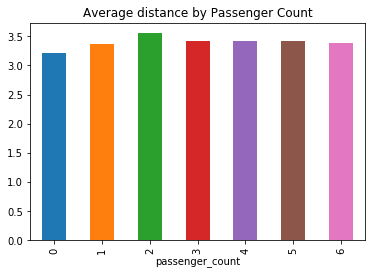

In [21]:
c=df.groupby('passenger_count')['distance'].mean()
c.plot(kind="bar")
plt.title("Average distance by Passenger Count")

If we look at the mean of distance for each passenger count we cannot create any conclusions since they all look similar. We need to apply ANOVA with # of sample 2 to get statistics.

C:\Users\asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Does passenger size affect the distance')

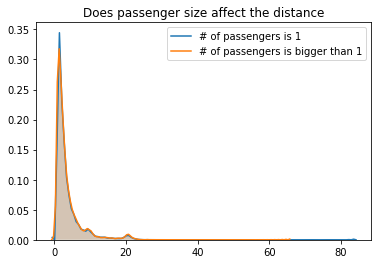

In [22]:
onecount = df[(df["passenger_count"] == 1) ]["distance"]
morethanone = df[(df["passenger_count"] > 1) ]["distance"]

ax = sns.kdeplot(onecount.rename("# of passengers is 1"),shade = True)
sns.kdeplot(morethanone.rename("# of passengers is bigger than 1"),shade = True)

plt.title("Does passenger size affect the distance")


As seen on the graph # of passengers 1 and # of passengers bigger than 1 looks similar there is no big difference in the graph.

In [23]:
from scipy import stats #From scipy import stats

We applied ANOVA test to get pvalue(I could have used t-test but I will use it in the next hypothesis test.

In [24]:
stats.f_oneway(onecount, morethanone) #Get the pvalue of our data 

F_onewayResult(statistic=24.56439528437675, pvalue=7.196658293701785e-07)

We see that our p-value is way too below 0.05 so we can reject that our null hypothesis. In short our null hypothesis came out false. Due to these values we cannot say distance is affected by day of the week(weekend,weekday).

### 2. Do trip distances increase in weekends?

Again we need to create null hypothesis and apply suitable statistical test.

### • Null Hypothesis: The day of the week has no effect on the distance.

In [25]:
def assign_week(week): #Function to assign day of the week to day_type column
    if week=="Sunday":
        return "Weekend"
    elif week=="Saturday":
        return "Weekend"
    else:
        return "Weekday"

df["Day_type"]=""

In [26]:
for index, row in df.iterrows(): # iterate over each row and apply weekend if the selected cell is weekend and the way other.
    if index>=0:
        df.at[index,"Day_type"]=assign_week(df.at[index,"day"])

Text(0.5, 1.0, 'Average Distance in Each Day')

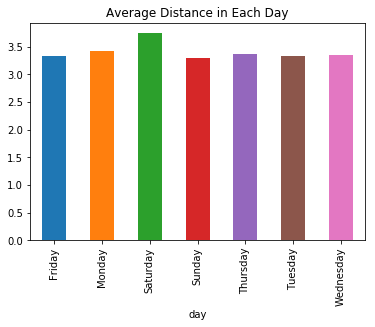

In [27]:
c=df.groupby('day')['distance'].mean()
c.plot(kind="bar")
plt.title("Average Distance in Each Day")

If we look at the average distance in each day we see that sunday has the highest average but we cannot say that distance in weekend increase only to this fact we need to apply t-test by using two samples named weekday and weekend.

In [28]:
weekday = df[(df["Day_type"] == "Weekday") ]["distance"]
weekend = df[(df["Day_type"] == "Weekend") ]["distance"]

Text(0.5, 1.0, 'Do trip distances increase in weekends?')

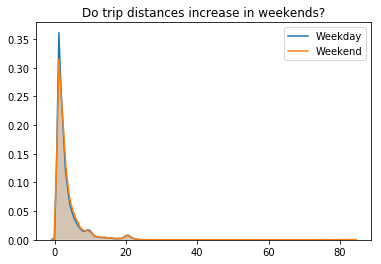

In [29]:
ax = sns.kdeplot(weekday.rename("Weekday"),shade = True)
sns.kdeplot(weekend.rename("Weekend"),shade = True)

plt.title("Do trip distances increase in weekends?")

Again as seen on the graph both behaves in the same way there is no big difference.

We need to apply ttest since we have two different samples and see the difference.

In [30]:
stats.ttest_ind(weekday, weekend, equal_var=False) #Apply t-test to get p value(correspondence) between weekday and weekend.

Ttest_indResult(statistic=-5.604877366928609, pvalue=2.092414433069292e-08)

We see that our p-value is below 0.05 so we can deny that our null hypothesis is correct in short our null hypothesis came out false. Due to these values we cannot say distance is affected by day of the week(weekend,weekday).